## Instacart Market Basket Analysis
(캐글 커널)https://www.kaggle.com/c/instacart-market-basket-analysis <br>
(캐글 노트북 eda)https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart <br>
(jupyter notebook) https://gist.github.com/goodvc78/3653c8f6a510f619d7ad6570111f38d8 <br>
(브런치) https://brunch.co.kr/@goodvc78/17

--------------------------------------------------------
### Objective:

The goal of the competition is to predict which products will be in a user's next order. The dataset is anonymized and contains a sample of over 3 million grocery orders from more than 200,000 Instacart users.

For each user, 4 and 100 of their orders are given, with the sequence of products purchased in each order

### what I learned

1. x축 글자 세로로 회전
    * plt.xticks(rotation='vertical') <br>
<br>
2. groupby 한 후 aggregate() 로 연산 가능 
    * orders_df.groupby("eval_set")["user_id"].aggregate(get_unique_count) <br>
<br>
3. 요일별, 시간별, 주문량 히트맵 그릴때 pivot활용
    * grouped_df.pivot('order_dow', 'order_hour_of_day', 'order_number') <br>
<br>
4. 

In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'

In [13]:
order_products_train_df = pd.read_csv("./data/order_products__train.csv")
order_products_prior_df = pd.read_csv("./data/order_products__prior.csv")
orders_df = pd.read_csv("./data/orders.csv")
products_df = pd.read_csv("./data/products.csv")
aisles_df = pd.read_csv("./data/aisles.csv")
departments_df = pd.read_csv("./data/departments.csv")

In [23]:
orders_df['eval_set'].unique()

array(['prior', 'train', 'test'], dtype=object)

In [62]:
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [37]:
orders_df.eval_set.value_counts()

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

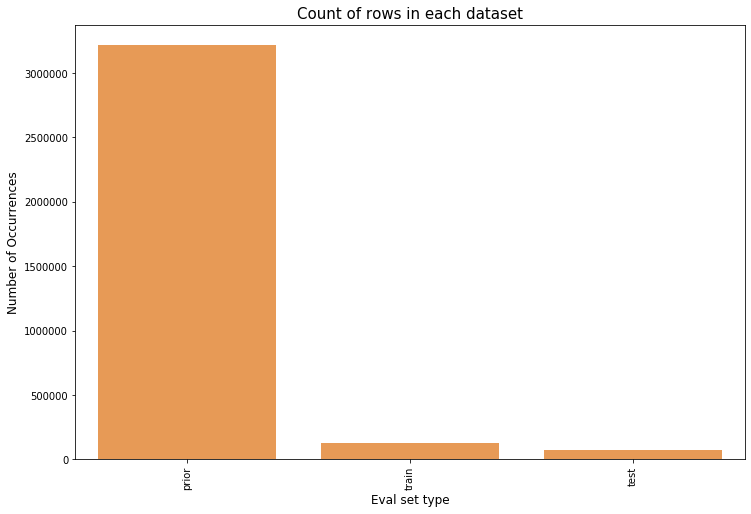

In [30]:
cnt_srs=orders_df.eval_set.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Eval set type', fontsize=12)
plt.title('Count of rows in each dataset', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [38]:
def get_unique_count(x):
    return len(np.unique(x))

cnt_srs = orders_df.groupby("eval_set")["user_id"].aggregate(get_unique_count)
cnt_srs

eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64

* 전체 206,209 명의 고객이 있는 것을 확인. <br>
마지막 구매인 131,209명의 고객들은 train set으로 주어졌다. 그리고 우리는 남은 75,000고객들을 예측해야 한다.

In [51]:
# 한 사용자가 주문한 최대개수 별 사용자카운트
cnt_srs

4     23986
5     19590
6     16165
7     13850
8     11700
      ...  
94       57
91       56
97       54
98       50
99       47
Name: order_number, Length: 97, dtype: int64

**한 사람당 구매 최대개수 별 카운팅**
* 4개보다 적게 산 사람은 없고, 최대로 많이산 사람은 100개임.

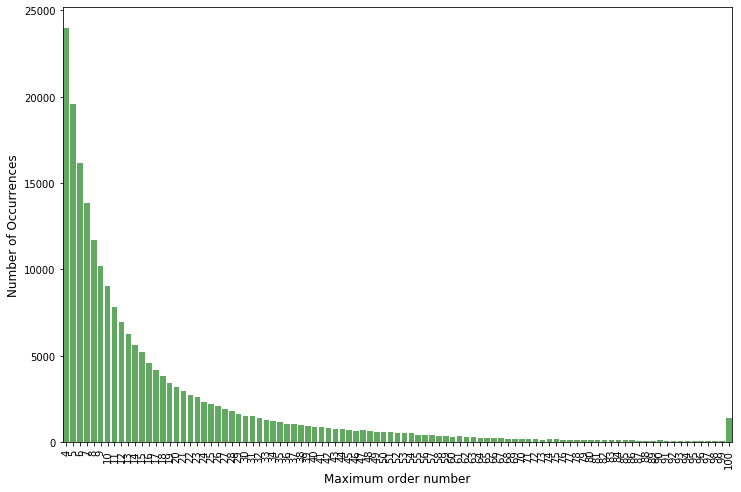

In [49]:
# 한 사용자의 order_number의 최대값
cnt_srs=orders_df.groupby("user_id")["order_number"].aggregate(np.max).reset_index()
cnt_srs =cnt_srs.order_number.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[2])
plt.ylabel('Number of Occurrences',fontsize=12)
plt.xlabel('Maximum order number',fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

**요일별 주문량**
* 아래 그래프를 보면, 토요일 일요일에 주문이 많고 수요일에 가장 적음.

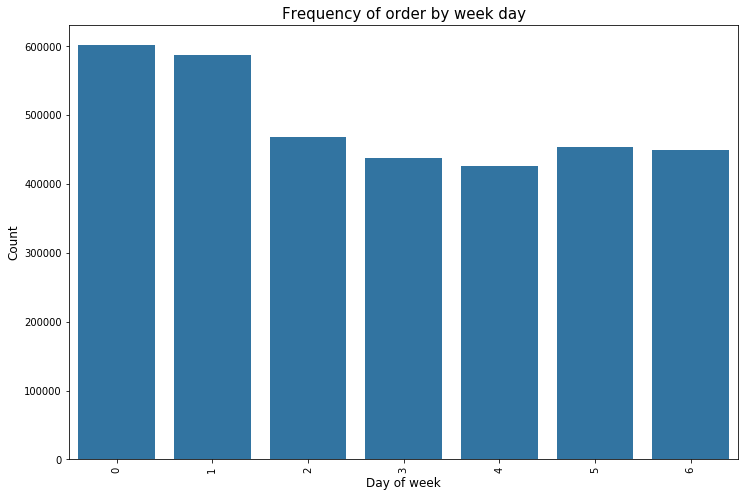

In [56]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_dow", data=orders_df, color=color[0])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by week day", fontsize=15)
plt.show()

**시간대 별 주문량**
* 대부분 주문이 day time에 주로 일어남.

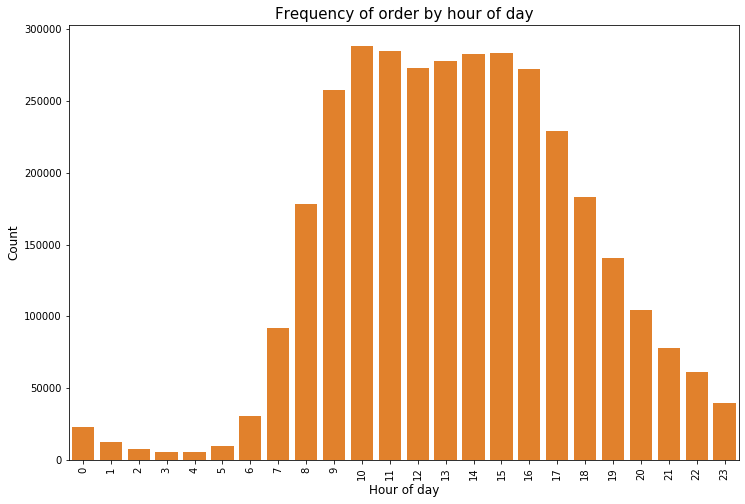

In [60]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_hour_of_day",data=orders_df,color=color[1])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by hour of day", fontsize=15)
plt.show()

**요일별 주문량과 시간별 주문량을 함께 확인**
* 토요일 저녁과 일요일 오전이 주문 피크타임

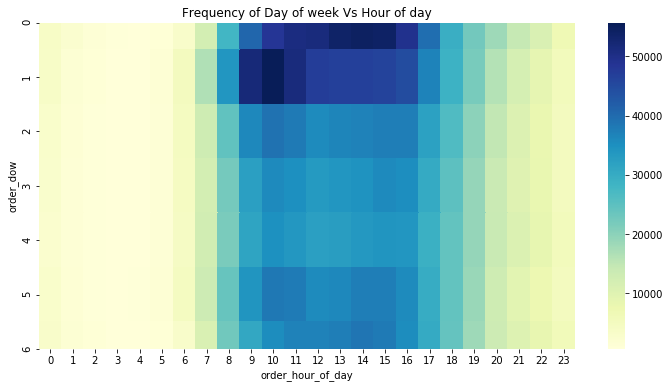

In [71]:
grouped_df=orders_df.groupby(["order_dow","order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_df=grouped_df.pivot('order_dow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df,cmap='YlGnBu')
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

**주문 간의 시간간격**
* 매주 1회 주문하는 사람 또는, 한달에 1회 주문하는 사람드이 많은것으로 보임. 또한, 14, 21, 28일에 작은 피크가 보임.(주 간격)


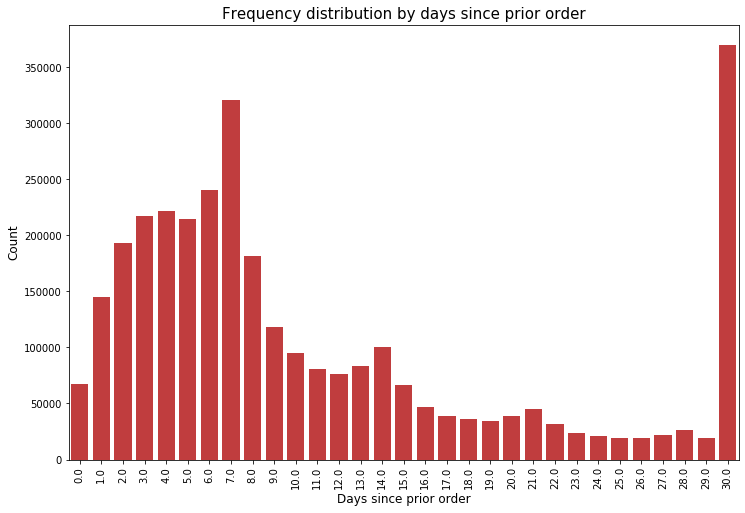

In [72]:
plt.figure(figsize=(12,8))
sns.countplot(x="days_since_prior_order", data=orders_df, color=color[3])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Days since prior order', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency distribution by days since prior order", fontsize=15)
plt.show()